# <font size='10' color='#1ABC9C'> Transforming the Data </font>

Handling the Skewness in continuous Features.

Handling Categorical Features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
## When using the 'inline' backend, 
## your matplotlib graphs will be included in your notebook, next to the code.
import seaborn as sns
from scipy import stats
pd.pandas.set_option('display.max_columns',None)

In [2]:
dataset=pd.read_csv('IncomeData.csv')

##What's the shape of data set
print(dataset.shape)

(4508, 13)


## Basic Summary of the Varables in the Data Set
edcat - Categorical Data

default - Categorical Data and binary

jobsat - Categorical Data and ordinal

homeown - Categorical Data and binary

cars - Descrete and numerical Data

yrsed - Descrete and numerical Data

yrsempl - Descrete and numerical Data

address - Descrete and numerical Data

age - Descrete and numerical Data

Income - Descrete and Dependent Variable

creddebt- Continuous and Numeric Data

othdebt - Continuous and Numeric Data

carvalue- Continuous and Numeric Data


### One-Hot encoding for categorical feature 
We'll do this only for edcat , as other categorical features are already either binary or ordinally encoded

##### checking missing values

In [3]:
#What percentage of Missing Values are there in the each feature

## Create a List of all features with missing values
features_miss_val=[features for features in dataset.columns if dataset[features].isnull().sum()>1] 
print(features_miss_val)

[]


##### >>>>>>No missing Values in Data

In [4]:
temp = pd.get_dummies(dataset['edcat'],drop_first=True)
dataset = pd.concat([dataset , temp],axis=1)
##droping the edcat
dataset= dataset.drop(['edcat'],axis=1)

In [5]:
dataset.rename(columns = {"2":'edcat2'}, inplace = True)
dataset.rename(columns = {'3':'edcat3'}, inplace = True)
dataset.rename(columns = {'4':'edcat4'}, inplace = True)
dataset.rename(columns = {'5':'edcat5'}, inplace = True)
dataset.head()

,age,yrsed,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue,2,3,4,5
0,45,6,4,17,0.371518,1.294482,0,4,1,22,1,9.1,0,0,0,0
1,67,6,15,12,0.375552,0.392448,0,3,1,28,1,5.9,0,0,0,0
2,68,6,7,9,0.200970,0.789030,0,5,0,21,1,5.8,0,0,0,0
3,75,6,35,16,0.314096,0.757904,0,4,0,11,1,5.8,0,0,0,0
4,38,7,8,37,0.143190,0.411810,0,3,0,11,1,22.1,0,0,0,0


In [6]:
dataset.shape

(4508, 16)

# log Transformation  of all values other than categorical data and descrete data


['income']


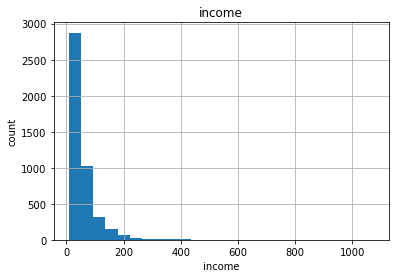

In [7]:
list_features = (['income'])
print(list_features)
dataset['income'].hist(bins=25)
plt.xlabel('income')
plt.ylabel('count')
plt.title('income')
plt.show()

In [8]:
dataset.head()

,age,yrsed,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue,2,3,4,5
0,45,6,4,17,0.371518,1.294482,0,4,1,22,1,9.1,0,0,0,0
1,67,6,15,12,0.375552,0.392448,0,3,1,28,1,5.9,0,0,0,0
2,68,6,7,9,0.200970,0.789030,0,5,0,21,1,5.8,0,0,0,0
3,75,6,35,16,0.314096,0.757904,0,4,0,11,1,5.8,0,0,0,0
4,38,7,8,37,0.143190,0.411810,0,3,0,11,1,22.1,0,0,0,0


In [9]:
for i in range (0,len(dataset['creddebt'])):
    if dataset['creddebt'][i] <0:
        print(dataset['creddebt'][i])

In [10]:
## for feature in list_features:
## income_data = dataset['income'].copy()
dataset['income'], fitted_lambda  = stats.boxcox(dataset['income'])
dataset.head()

,age,yrsed,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue,2,3,4,5
0,45,6,4,2.252303,0.371518,1.294482,0,4,1,22,1,9.1,0,0,0,0
1,67,6,15,2.029856,0.375552,0.392448,0,3,1,28,1,5.9,0,0,0,0
2,68,6,7,1.836011,0.200970,0.789030,0,5,0,21,1,5.8,0,0,0,0
3,75,6,35,2.214519,0.314096,0.757904,0,4,0,11,1,5.8,0,0,0,0
4,38,7,8,2.704247,0.143190,0.411810,0,3,0,11,1,22.1,0,0,0,0


In [11]:

# Replacing infinite with nan
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
dataset.dropna(inplace=True)
  
# Printing df
dataset.shape

(4508, 16)

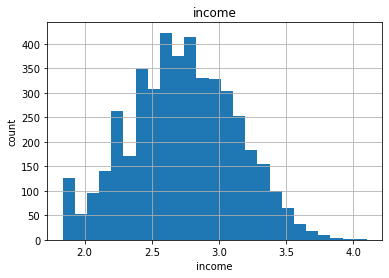

In [12]:
dataset['income'].hist(bins=25)
plt.xlabel('income')
plt.ylabel('count')
plt.title('income')
plt.show()


# <font size='10' color='#1ABC9C'> Handling the Outhliers </font>


In [13]:
# categorical features not included
list_features = ['income','creddebt','othdebt','cars','carvalue','yrsempl','yrsed','age','address']
list_features

['income',
 'creddebt',
 'othdebt',
 'cars',
 'carvalue',
 'yrsempl',
 'yrsed',
 'age',
 'address']

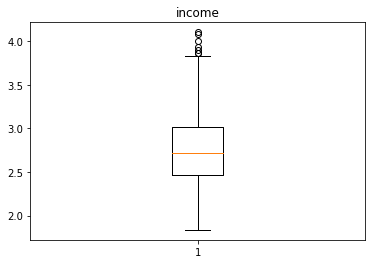

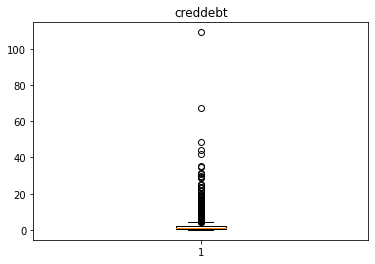

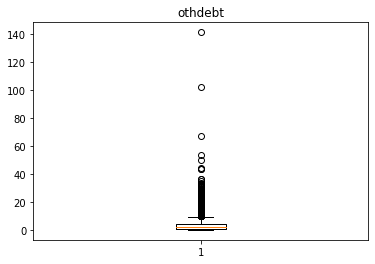

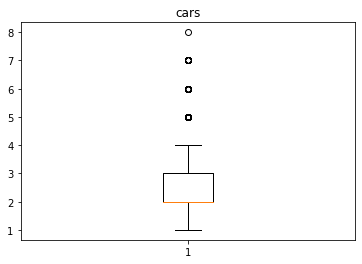

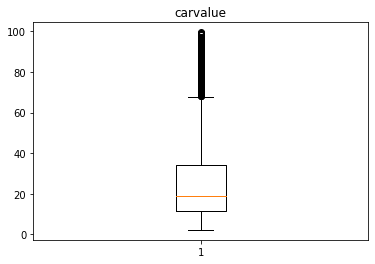

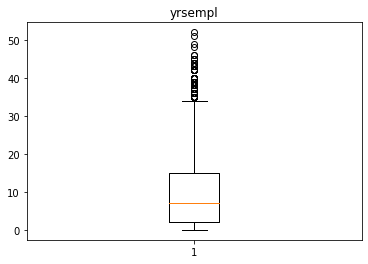

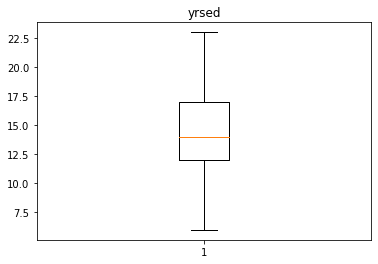

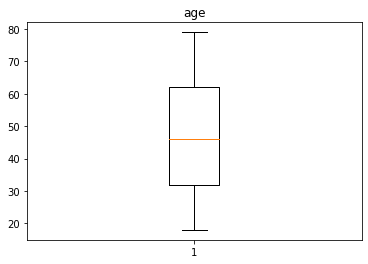

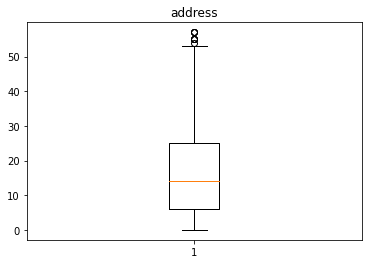

In [16]:
for feature in list_features:
    plt.boxplot(dataset[feature])
    plt.title(feature)
    plt.show()

In [17]:
for feature in list_features:
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3 - Q1
    print('IQR of {} is '.format(feature),IQR )

IQR of income is  0.5587704437833878
IQR of creddebt is  1.6885934999999999
IQR of othdebt is  3.452293
IQR of cars is  1.0
IQR of carvalue is  22.7
IQR of yrsempl is  13.0
IQR of yrsed is  5.0
IQR of age is  30.0
IQR of address is  19.0


#### Removing the Outliers greater than Q3 or Less than Q1


In [22]:
dataset.describe()


,age,yrsed,yrsempl,income,creddebt,othdebt,default,jobsat,homeown,address,cars,carvalue,2,3,4,5
count,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000,4508.000000
mean,46.931677,14.531500,9.718722,2.730436,1.897866,3.691447,0.238909,2.964286,0.628438,16.371340,2.367125,26.081788,0.314552,0.203416,0.219831,0.071650
std,17.665010,3.285624,9.650876,0.399283,3.542646,5.378583,0.426464,1.377274,0.483276,12.367679,1.157778,20.862577,0.464389,0.402584,0.414178,0.257937
min,18.000000,6.000000,0.000000,1.836011,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.200000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,12.000000,2.000000,2.460030,0.387923,0.982819,0.000000,2.000000,0.000000,6.000000,2.000000,11.300000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,14.000000,7.000000,2.718718,0.931824,2.081635,0.000000,3.000000,1.000000,14.000000,2.000000,18.900000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,17.000000,15.000000,3.018801,2.076516,4.435112,0.000000,4.000000,1.000000,25.000000,3.000000,34.000000,1.000000,0.000000,0.000000,0.000000
max,79.000000,23.000000,52.000000,4.101371,109.072596,141.459150,1.000000,5.000000,1.000000,57.000000,8.000000,99.600000,1.000000,1.000000,1.000000,1.000000


#### Credebt and Othdebt max values seem too much to be true, hence well trim those data points.

#### Reference : -https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
for handling other outliers , we'll use Quantile-based Flooring and Capping , as max values for all other features seem to be true

In [28]:
for feature in list_features:
    print(feature ," - ", dataset[feature].skew())
    
    


income  -  0.0017379656714312723
creddebt  -  5.605083434854328
othdebt  -  3.800955407606644
cars  -  0.876190300358725
carvalue  -  1.5301955214937446
yrsempl  -  1.2505481845832198
yrsed  -  0.020539924785500454
age  -  0.09494803175250664
address  -  0.7180720446811186


#### creddebt , othdebt , cars ,carvalue , yrsempl and address are right skewed

where creddebt , othdebt are highly skewed , followed by carvalue , yrsempl 

In [27]:
# trimming values more than = 100 in creddebt and othdebt

index = dataset[(dataset['creddebt'] >= 100)].index
dataset.drop(index, inplace=True)
dataset['creddebt'].describe()

index = dataset[(dataset['othdebt'] >= 100)].index
dataset.drop(index, inplace=True)
dataset['othdebt'].describe()

count    4506.000000
mean        3.638987
std         4.750514
min         0.000000
25%         0.982326
50%         2.081271
75%         4.421345
max        66.927900
Name: othdebt, dtype: float64

In [29]:
# Quantile-based Flooring and Capping 
list_features=['creddebt','othdebt','carvalue','yrsempl']
for feature in list_features:
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3 - Q1
    dataset[feature] = np.where(dataset[feature] <Q1, Q1,dataset[feature])
    dataset[feature] = np.where(dataset[feature] >Q3, Q3,dataset[feature])
   

for feature in list_features:
    print(feature ," - ", dataset[feature].skew())
    

creddebt  -  0.3192616077247981
othdebt  -  0.3202949296935166
carvalue  -  0.28317592346296044
yrsempl  -  0.252872518780415


In [30]:
dataset.shape

(4506, 16)

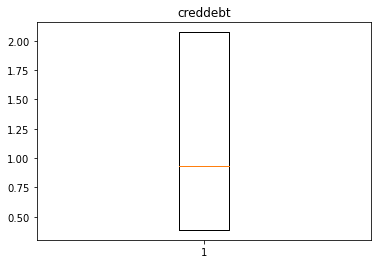

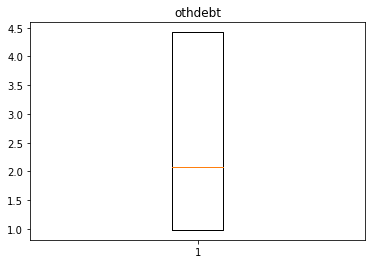

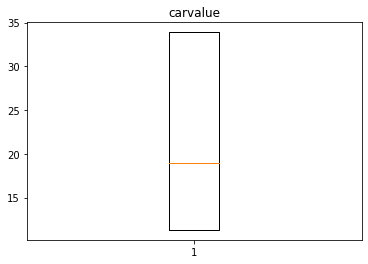

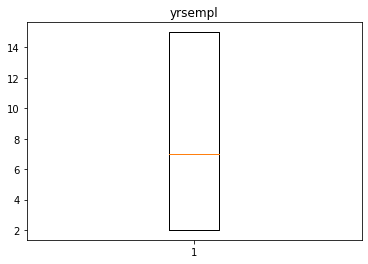

In [31]:
for feature in list_features:
    plt.boxplot(dataset[feature])
    plt.title(feature)
    plt.show()

## Moving to Assumption Testing


In [32]:
dataset.to_csv('dataset_cleaned.csv',index=False)